In [1]:
!gdown --id 1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt  # подгрузка датасета предварительно загруженного на диск

Downloading...
From: https://drive.google.com/uc?id=1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt
To: /content/kinopoisk-top250.csv
100% 298k/298k [00:00<00:00, 2.51MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


films = pd.read_csv('kinopoisk-top250.csv', delimiter=',')# данные по кинопоиску

In [3]:
films

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...
...,...,...,...,...,...,...,...,...,...,...
245,245,Крамер против Крамера,1979,США,7.984,Тед Крамер; целиком посвятив себя карьере; не ...,Роберт Бентон,Роберт Бентон; Эйвери Кормэн,Дастин Хоффман; Мэрил Стрип; Джейн Александр; ...,'https://st.kp.yandex.net/images/film_iphone/i...
246,246,Пираты Карибского моря: На краю Света,2007,США,8.007,Новые приключения Джека Воробья и его друзей У...,Гор Вербински,Тед Эллиот; Терри Россио; Стюарт Битти; ...,Джонни Депп; Джеффри Раш; Орландо Блум; Кира Н...,'https://st.kp.yandex.net/images/film_iphone/i...
247,247,Иди и смотри,1985,СССР,8.077,Флера — шестнадцатилетний мальчишка; откопавши...,Элем Климов,Алесь Адамович; Элем Климов,Алексей Кравченко; Ольга Миронова; Любомирас Л...,'https://st.kp.yandex.net/images/film_iphone/i...
248,248,Профессионал,1981,Франция,8.112,Убить президента африканской республики. Такое...,Жорж Лотнер,Мишель Одиар; Патрик Александер; Жорж Лотне...,Жан-Поль Бельмондо; Жан Дезайи; Сирил Клер; Ма...,'https://st.kp.yandex.net/images/film_iphone/i...


In [4]:
films.info()# сводная инфа по всем данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        250 non-null    int64  
 1   movie         250 non-null    object 
 2   year          250 non-null    int64  
 3   country       250 non-null    object 
 4   rating_ball   250 non-null    float64
 5   overview      250 non-null    object 
 6   director      250 non-null    object 
 7   screenwriter  250 non-null    object 
 8   actors        250 non-null    object 
 9   url_logo      250 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [5]:
films['overview']#  описание Описания в основном содержат 30-60 слов. Масимум -120

0      Бухгалтер Энди Дюфрейн обвинён в убийстве собс...
1      Пол Эджкомб — начальник блока смертников в тюр...
2      От лица главного героя Форреста Гампа; слабоум...
3      Фильм рассказывает реальную историю загадочног...
4      Пострадав в результате несчастного случая; бог...
                             ...                        
245    Тед Крамер; целиком посвятив себя карьере; не ...
246    Новые приключения Джека Воробья и его друзей У...
247    Флера — шестнадцатилетний мальчишка; откопавши...
248    Убить президента африканской республики. Такое...
249    Двое бывших политзаключённых; недавно вышедших...
Name: overview, Length: 250, dtype: object

In [6]:
count_words = lambda x: len(x.split())#1. 1 и 2 одинаковые запросы просто сделаны по разному
def count_words(x):# 2. функция принимает текст и считает его длинну
  return len(x.split())

In [11]:
x = 'Тед Крамер; целиком посвятив себя карьере'# у нас есть текст

In [12]:
x.split()# команда сплит разделяет текст по пробелам на список по умолчанию (пустые скобки)

['Тед', 'Крамер;', 'целиком', 'посвятив', 'себя', 'карьере']

In [13]:
len(x.split())# команда лен считает длинну списка

6

In [18]:
x = 'Тед Крамер_целиком_посвятив_себя_карьере'

In [19]:
x.split('_')

['Тед Крамер', 'целиком', 'посвятив', 'себя', 'карьере']

In [14]:
films['overview'].apply(count_words)

0      63
1      47
2      60
3      21
4      47
       ..
245    73
246    46
247    56
248    43
249    38
Name: overview, Length: 250, dtype: int64

In [16]:
films['count_words'] = films['overview'].apply(count_words)# команда аплай создает новую колонку с длинной текста

In [17]:
films# видим что создалась новая колонка

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,count_words
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,63
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,47
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,60
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,21
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,47
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Крамер против Крамера,1979,США,7.984,Тед Крамер; целиком посвятив себя карьере; не ...,Роберт Бентон,Роберт Бентон; Эйвери Кормэн,Дастин Хоффман; Мэрил Стрип; Джейн Александр; ...,'https://st.kp.yandex.net/images/film_iphone/i...,73
246,246,Пираты Карибского моря: На краю Света,2007,США,8.007,Новые приключения Джека Воробья и его друзей У...,Гор Вербински,Тед Эллиот; Терри Россио; Стюарт Битти; ...,Джонни Депп; Джеффри Раш; Орландо Блум; Кира Н...,'https://st.kp.yandex.net/images/film_iphone/i...,46
247,247,Иди и смотри,1985,СССР,8.077,Флера — шестнадцатилетний мальчишка; откопавши...,Элем Климов,Алесь Адамович; Элем Климов,Алексей Кравченко; Ольга Миронова; Любомирас Л...,'https://st.kp.yandex.net/images/film_iphone/i...,56
248,248,Профессионал,1981,Франция,8.112,Убить президента африканской республики. Такое...,Жорж Лотнер,Мишель Одиар; Патрик Александер; Жорж Лотне...,Жан-Поль Бельмондо; Жан Дезайи; Сирил Клер; Ма...,'https://st.kp.yandex.net/images/film_iphone/i...,43


Описания в основном содержат 30-60 слов. Масимум -120

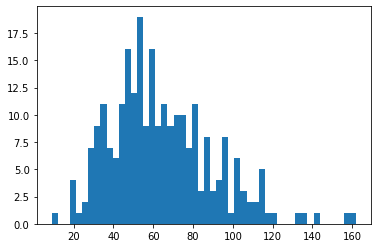

In [8]:
plt.hist(films['count_words'], bins= 50)   # распределение количества слов
plt.show()

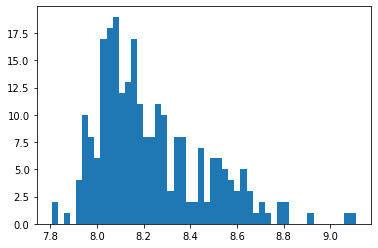

In [9]:
plt.hist(films['rating_ball'], bins= 50) #распределение рейтингов
plt.show()

Гистограмма распределения рейтингов. Видим, что они все больше 8.0. Наверное, предсказать будет не так сложно. Но вопрос сводится к точности, сможем ли мы предсказать рейтинг вплоть до сотых или +-0.5 совершенно разное качество

задача здесь создается модель которая на основе описания фильма будет предсказывать его рейтинг

In [20]:
from sklearn.model_selection import cross_val_score # функция подсчета точности
from sklearn.model_selection import train_test_split # функция разбиения на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # векторайзер - преобразует тексты в машинный вид
from sklearn.linear_model import LinearRegression # Модель машинного обучения
from sklearn.metrics import mean_absolute_error # Метрика для оценки ошибки

import pandas as pd # Библиотека для работы с таблицами
import numpy as np  # Библиотека для работы с массивами и матрицами
import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд

nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

!gdown --id 1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt  # подгрузка датасета предварительно загруженного на диск

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [21]:
df = pd.read_csv('kinopoisk-top250.csv', delimiter=',') # подгружаем таблицу


stemmer_ru = SnowballStemmer("russian") 
ru_stop_words = set(stopwords.words('russian'))
def stemm_text(text, stemmer, stop_words):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам"""
    tokens = [stemmer.stem(word) for word in word_tokenize(text) if word not in stop_words]
    tokens = ' '.join(tokens)
    return tokens


df['stemmed_overview'] = df['overview'].apply(lambda x: stemm_text(x, stemmer_ru, ru_stop_words)) # генерируем колонку stemmed_overview, прогоняя значения колонки overview через функцию обработки



train_text, test_text = train_test_split(df['stemmed_overview'], test_size=0.25, random_state=42) # рзабиваем данные на тренировочную и проверочную выборку
train_labels, test_labels = train_test_split(df['rating_ball'], test_size=0.25, random_state=42) # отдельно тексты, отдельно рейтинги
all_text = pd.concat([train_text, test_text]) # создаем переменную со всем текстами

word_vectorizer = TfidfVectorizer()

word_vectorizer.fit(all_text) # обучение векторазера преобразовывать тексты из нашей коллекции

train_word_features = word_vectorizer.transform(train_text) # преобразовываение нужных для трейна и теста видео
test_word_features = word_vectorizer.transform(test_text)


regression = LinearRegression() # создание модели машинного обучения

cv_score = np.mean(cross_val_score(regression, train_word_features, train_labels, cv=5, scoring='neg_mean_absolute_error')) # автоматическая функция тестирования(со встроенным обучением)
print('CV score is {}'.format(cv_score))

regression.fit(train_word_features, train_labels) # обучаем модель отедльно
pred = regression.predict(test_word_features) # пытаемся предсказать для теста
mean_absolute_error(test_labels, pred) # проверяем точность предсказаний

CV score is -0.18337326529710724


0.1831892436260428

In [22]:
# Демонстрация модели
def predict_raiting(text, true_raiting, vectorizer, model):
  print('Настоящий рейтинг: {}'.format(true_raiting))
  print()
  print('Исходный текст:')

  print(text)

  transformed_text = stemm_text(text, stemmer_ru, ru_stop_words)
  print()
  print('Обработанный текст:')
  print(transformed_text)
  text_features = vectorizer.transform([transformed_text])

  pred = model.predict(text_features)
  print()
  print('Предсказанный рейтинг: {}'.format(pred[0]))

In [24]:
example_text = df['overview'][6]
example_raiting = df['rating_ball'][6]

print (example_text, example_raiting)

Профессиональный убийца Леон; не знающий пощады и жалости; знакомится со своей очаровательной соседкой Матильдой; семью которой расстреливают полицейские; замешанные в торговле наркотиками. Благодаря этому знакомству он впервые испытывает чувство любви; но… 8.681000000000001


In [25]:
predict_raiting(example_text, example_raiting, word_vectorizer, regression)

Настоящий рейтинг: 8.681000000000001

Исходный текст:
Профессиональный убийца Леон; не знающий пощады и жалости; знакомится со своей очаровательной соседкой Матильдой; семью которой расстреливают полицейские; замешанные в торговле наркотиками. Благодаря этому знакомству он впервые испытывает чувство любви; но…

Обработанный текст:
профессиональн убийц леон ; знающ пощад жалост ; знаком сво очаровательн соседк матильд ; сем котор расстрелива полицейск ; замеша торговл наркотик . благодар эт знакомств вперв испытыва чувств любв ; но…

Предсказанный рейтинг: 8.207643470888712


Команда афроамериканок проводит для НАСА ряд математических вычислений, необходимых для запуска первой космической миссии

In [29]:
# Демонстрация модели
example_text = input('Введите текст: ')
example_raiting = 7.6


predict_raiting(example_text, example_raiting, word_vectorizer, regression)

Введите текст: Во времена Холодной войны секретная организация «Патриот» создала отряд супергероев, в который вошли участники из различных советских республик. Долгие годы героям приходилось скрывать свою сущность, однако в тяжелые для страны времена они вновь берутся за дело.
Настоящий рейтинг: 7.6

Исходный текст:
Во времена Холодной войны секретная организация «Патриот» создала отряд супергероев, в который вошли участники из различных советских республик. Долгие годы героям приходилось скрывать свою сущность, однако в тяжелые для страны времена они вновь берутся за дело.

Обработанный текст:
во врем холодн войн секретн организац « патриот » созда отряд супергеро , котор вошл участник различн советск республик . долг год геро приход скрыва сущност , однак тяжел стран врем внов берут дел .

Предсказанный рейтинг: 8.224056012551507


In [30]:
# Демонстрация модели
example_text = input('Введите текст: ')
example_raiting = 3


predict_raiting(example_text, example_raiting, word_vectorizer, regression)

Введите текст: Во времена Холодной войны секретная организация «Патриот» создала отряд супергероев, в который вошли участники из различных советских республик. Долгие годы героям приходилось скрывать свою сущность, однако в тяжелые для страны времена они вновь берутся за дело.
Настоящий рейтинг: 3

Исходный текст:
Во времена Холодной войны секретная организация «Патриот» создала отряд супергероев, в который вошли участники из различных советских республик. Долгие годы героям приходилось скрывать свою сущность, однако в тяжелые для страны времена они вновь берутся за дело.

Обработанный текст:
во врем холодн войн секретн организац « патриот » созда отряд супергеро , котор вошл участник различн советск республик . долг год геро приход скрыва сущност , однак тяжел стран врем внов берут дел .

Предсказанный рейтинг: 8.224056012551507


Основы NLP: базовые операции с текстами

In [31]:
!pip install pymystem3==0.1.1 # устанавливаем библимотеку

  Created wheel for pymystem3: filename=pymystem3-0.1.1-py3-none-any.whl size=7848 sha256=6154fd5b9999f6cfb2955a1a0c1a7cdd230f9e0b75ce7a1cfb0cab38b99bea19
  Stored in directory: /root/.cache/pip/wheels/2a/2d/52/bf8806a7879cc1764f864f87a8cce9f0c7575539c1b596183c
Successfully built pymystem3
  Attempting uninstall: pymystem3
    Found existing installation: pymystem3 0.2.0
    Uninstalling pymystem3-0.2.0:
      Successfully uninstalled pymystem3-0.2.0


In [32]:
import nltk # импортируем библиотеку

In [33]:
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

Токенизация и основы библиотеки nltk
В пакете NLTK много различных токенизатров - классов, которые нужны для обработки сырых корпусов текстов и разделения их на атомарные частицы - токены

Так же есть отдельные токенизаторы, чтобы делить корпуса текста на предложения.

Многообразие токенизаторов обусловлено тем, что иногда для обработки разных языков требуются разные правила обработки слов и пунктуации.

импортируем из nltk токенизаторы, рекомендованные разработчиками библиотеки - они самые общие и подходят для большинства случаев

In [34]:
from nltk.tokenize import word_tokenize, sent_tokenize #готовые токенизации (word_tokenize, sent_tokenize) есть в этой библиотеке 

word_tokenize  основан на регулярных выражениях, с помощью которых происходит выделение токенов

sent_tokenize  токенизатор для предложений. В процессе токенизации обучается модель, которая учится распознаваь структуру текстового корпуса, паттерны языка, аббревиатуры и так далее, которые будут полезны для грамотного разделения корпуса на предложения

In [36]:
text = """Сегодня мы познакомимся с базовыми методами обработки текста. Для работы с данными вначале их нужно привести в машинный вид. Один из этапов этого преобразования - токенезация"""

In [37]:
sentences = sent_tokenize(text) #  подали всю строку и получили предложения 

In [38]:
sentences

['Сегодня мы познакомимся с базовыми методами обработки текста.',
 'Для работы с данными вначале их нужно привести в машинный вид.',
 'Один из этапов этого преобразования - токенезация']

In [42]:
'Сегодня' == 'сегодня'

False

In [43]:
'пират' == 'пирата'

False

In [44]:
'пира' == 'пира'

True

In [39]:
tokens = word_tokenize(text)

In [40]:
tokens

['Сегодня',
 'мы',
 'познакомимся',
 'с',
 'базовыми',
 'методами',
 'обработки',
 'текста',
 '.',
 'Для',
 'работы',
 'с',
 'данными',
 'вначале',
 'их',
 'нужно',
 'привести',
 'в',
 'машинный',
 'вид',
 '.',
 'Один',
 'из',
 'этапов',
 'этого',
 'преобразования',
 '-',
 'токенезация']

Нормализация текстов. Стемминг и лемматизация

Процесс нормализации позволяет убрать из исходного текста грамматическую информацию (падежи, числа, глагольные виды и времена, залоги причастий, род и так далее), оставляя смысловую составляющую.

Лемматизация и стемминг – это частные случаи нормализации и они отличаются.
Формально, как стемминг, так и лемматизация - это процессы нахождения основы слова для заданного исходного слова. В примере ниже `wait` - это основа слова, а рядом изображыен его произвдные.

Стемминг и лемматизация используется в информационном поиске при обработке текстового запроса, а так же в ряде других прикладных задач

В чем разница между лемматизацией и стеммингом?

In [ ]:
'пират' == 'пирата'

False

In [ ]:
'пира' == 'пира'# это стемминг

True

Стемминг – это грубый и "сырой" процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.

Лемматизация – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.

Отличие в том, что стеммер действует без знания контекста и, соответственно, не понимает разницу между словами, которые имеют разный смысл в зависимости от части речи. Однако у стеммеров есть и свои преимущества: их проще внедрить и они работают быстрее. Плюс, более низкая «аккуратность» может не иметь значения в некоторых случаях.

Существует много алгоритмов-стэммеров. Одним из самых первых является алгоритм Портера. О нем можно почитать подробнее по ссылке https://tartarus.org/martin/PorterStemmer/

Также существует реализация стемминга/лемматизации от Яндекса, которую писал сам Илья Сегалович. Подробнее можео почитать вот тут https://yandex.ru/dev/mystem/

В качестве примера воспользуемся алгоритмом Портера, который реализован в библиотеке nltk, он работает для английских текстов

In [46]:
from nltk.stem import PorterStemmer

In [48]:
en_sentence = 'NLTK is a leading platform for building Python programs to work with human language data'

In [49]:
stemmer = PorterStemmer()

words = word_tokenize(en_sentence)

for word in words:
    print(word + ":" + stemmer.stem(word))

NLTK:nltk
is:is
a:a
leading:lead
platform:platform
for:for
building:build
Python:python
programs:program
to:to
work:work
with:with
human:human
language:languag
data:data


Для стемминга других языков можно использовать класс SnowballStemmer, где нужно прописать какой конкретно язык предполагается обрабатывать. Этот алгоритм настроен для разных языков. Список можно посмотреть в документации.

In [50]:
from nltk.stem.snowball import SnowballStemmer

In [51]:
stemmer = SnowballStemmer("russian")

In [52]:
ru_sentence = "Сегодня мы познакомимся с базовыми методами обработки текста"

for word in word_tokenize(ru_sentence):
    print(word + ":" + stemmer.stem(word))

Сегодня:сегодн
мы:мы
познакомимся:познаком
с:с
базовыми:базов
методами:метод
обработки:обработк
текста:текст


In [57]:
stop_words = ['c']

Лемматизация
В пакете nltk для лемматизации английских текстов можно вспользоваться WordNetLemmatizer

In [53]:
from nltk.stem import WordNetLemmatizer# импортируем не стемер а лимотайзер

In [54]:
lemmatizer = WordNetLemmatizer()

In [55]:
# WordNet — это большая лексическая база данных английского языка

nltk.download('wordnet')# дополнительный пакет бызы слов для использования лимотайзера

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
en_sentence = 'NLTK is a leading platform for building Python programs to work with human language data'

for word in word_tokenize(en_sentence):
    print(word + ":" + lemmatizer.lemmatize(word))

NLTK:NLTK
is:is
a:a
leading:leading
platform:platform
for:for
building:building
Python:Python
programs:program
to:to
work:work
with:with
human:human
language:language
data:data


Обратите внимание, что по сравнению со стэммингом, алгоритм лемматизации работает более грамотно, но и заметно дольше. При выборе алгоритма нужно ориентироваться на конкретную задачу и компромисс между скоростью работы и качеством

Для русских текстов протестируем реализацию для python алгоритма Pymorphy, который умеет лемматизировать тексты

In [58]:
!pip install pymorphy2# своя библиотека для обработки русского языка
import pymorphy2

     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 12.9 MB/s 


In [59]:
m = pymorphy2.MorphAnalyzer() #внешний лематайзер для русского языка

In [60]:
for word in word_tokenize(ru_sentence):
    print(word + ":" + m.parse(word)[0].normalized.word) # вместо lemmatizer.lemmatize(word) теперь прописываем такую конструкцию, но суть остается та же

Сегодня:сегодня
мы:мы
познакомимся:познакомиться
с:с
базовыми:базовый
методами:метод
обработки:обработка
текста:текст


In [63]:
m.parse(word)[0].normalized.word

'текст'

В примере, дополненном английским текстом, видим, что слова привелись к нижнему регистру, но дополнительно ничего сделано не было. 

In [65]:
ru_eng_sentence = "Сегодня мы познакомимся с базовыми методами обработки текста NLTK is a leading platform for building Python programs to work with human language data"
for word in word_tokenize(ru_eng_sentence):
    print(word + ":" + m.parse(word)[0].normalized.word) # вместо lemmatizer.lemmatize(word) теперь прописываем такую конструкцию, но суть остается та же

Сегодня:сегодня
мы:мы
познакомимся:познакомиться
с:с
базовыми:базовый
методами:метод
обработки:обработка
текста:текст
NLTK:nltk
is:is
a:a
leading:leading
platform:platform
for:for
building:building
Python:python
programs:programs
to:to
work:work
with:with
human:human
language:language
data:data


Для полноценной обработки и английского, нужно каждое слово прогнать не только через русский лемматизатор, но и дополнительно англйиский:

In [66]:
for word in word_tokenize(ru_eng_sentence):
    print(word + ":" + lemmatizer.lemmatize(m.parse(word)[0].normalized.word)) # вместо lemmatizer.lemmatize(word) теперь прописываем такую конструкцию, но суть остается та же

Сегодня:сегодня
мы:мы
познакомимся:познакомиться
с:с
базовыми:базовый
методами:метод
обработки:обработка
текста:текст
NLTK:nltk
is:is
a:a
leading:leading
platform:platform
for:for
building:building
Python:python
programs:program
to:to
work:work
with:with
human:human
language:language
data:data


Обработка стоп слов
В любом языке есть слова, которые употребляются в речи чаще других - к таким словам относятся предлоги, союзы, местоимения итд. Такие слова не всегда несут содержательный смысл, поэтому для анализа текстов бывает полезным сделать фильтр, который будет исключать из анализа стоп слова.

In [67]:
from nltk.corpus import stopwords

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
print(stopwords.words("russian"))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Пример нормализации данных с описаниями фильмов из топа 250 кинопоиска
Рассмотрим датасет, состоящий из коротких описаний фильмов (overview) и информации о них



In [71]:
!gdown --id 1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt  # подгрузка датасета предварительно загруженного на диск

Downloading...
From: https://drive.google.com/uc?id=1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt
To: /content/kinopoisk-top250.csv
100% 298k/298k [00:00<00:00, 2.35MB/s]


In [72]:
import pandas as pd
import numpy as np

films = pd.read_csv('kinopoisk-top250.csv', delimiter=',')

In [73]:
films.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...


Напишем функцию, которая будет принимать на вход текст с описанием фильма и возвращать леммы токенов предложения, отфильтрованные по стоп словам

In [ ]:
#Посмотрим как выглядит одно описание фильма на примере и сравним с тем, что вернет функция lemmatized_text

In [74]:
sample_overview = films['overview'][0]

sample_overview

'Бухгалтер Энди Дюфрейн обвинён в\xa0убийстве собственной жены и\xa0её любовника. Оказавшись в\xa0тюрьме под\xa0названием Шоушенк; он\xa0сталкивается с\xa0жестокостью и\xa0беззаконием; царящими по\xa0обе стороны решётки. Каждый; кто\xa0попадает в\xa0эти стены; становится их\xa0рабом до\xa0конца жизни. Но\xa0Энди; обладающий живым умом и\xa0доброй душой; находит подход как\xa0к заключённым; так\xa0и к\xa0охранникам; добиваясь их\xa0особого к\xa0себе расположения.'

In [83]:
words = ['1','2','3', 'он']# список слов
list1 = []
for word in words:#
  if word not in ru_stop_words:#  если слово не в списке стоп слов то мы его в новый список вносим
    list1.append(word)
list1

['2', '3']

In [82]:
list1 = [word for word in words if word not in ru_stop_words]
list1 #этот код идентичен верхнему

['2', '3']

In [84]:
words = ['1','2','3', 'он']

' '.join(words)

'1 2 3 он'

In [85]:
def text_processing(text, stemmer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    words = word_tokenize(text) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    
    words = [stemmer.stem(word) for word in words] # стеммируем каждое слово
    new_text = ' '.join(words)

    return new_text

In [86]:
import string#  в этой библиотеке содержиться список пунктуаций
punctuations = list(string.punctuation)

In [87]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
list('string.punctuation')

['s',
 't',
 'r',
 'i',
 'n',
 'g',
 '.',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [89]:
# set нужен для того, чтобы поиск по словам был быстрее (потребуется позже)
from nltk.corpus import stopwords

ru_stop_words = set(stopwords.words('russian'))

In [81]:
# к данному списку можно добавлять и свои слова, которые в считаете не важными или мешающими работе алгоритма в вашей конкретной задаче

my_stop_words = ['поэтому', '1']
ru_stop_words.update(my_stop_words)

В дополнение к списку стоп-слов "по умолчанию" бывает полезно добавить свои, характерные для конкретного проекта. Это можно сделать с помощью методов append() или extend() или update() для set

In [90]:
stemmer_ru = SnowballStemmer("russian") 


In [93]:
sample_text = films['overview'][1]
print('Исходный текст: '+sample_text)
stemmed_text = text_processing(sample_text, stemmer_ru, ru_stop_words, punctuations)
print('Обработанный текст: '+stemmed_text)


Исходный текст: Пол Эджкомб — начальник блока смертников в тюрьме «Холодная гора»; каждый из узников которого однажды проходит «зеленую милю» по пути к месту казни. Пол повидал много заключённых и надзирателей за время работы. Однако гигант Джон Коффи; обвинённый в страшном преступлении; стал одним из самых необычных обитателей блока.
Обработанный текст: пол эджкомб — начальник блок смертник тюрьм « холодн гор » кажд узник котор однажд проход « зелен мил » пут мест казн пол повида заключен надзирател врем работ однак гигант джон кофф обвинен страшн преступлен стал одн сам необычн обитател блок


In [94]:
punctuations

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [103]:
def func(x):
  return text_processing(x, stemmer_ru, ru_stop_words, punctuations)
func('которая принимает на вход список текстов')



'котор принима вход список текст'

In [104]:
def func(x):
  return text_processing(x, stemmer_ru, ru_stop_words, punctuations)


films['filtered_and_stemmed_overview'] = films['overview'].apply(func)

In [105]:
films

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,filtered_and_stemmed_overview
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энд дюфрейн обвин убийств собствен ж...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб — начальник блок смертник тюрьм « ...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лиц главн геро форрест гамп слабоумн безоби...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказыва реальн истор загадочн оскар ш...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострада результат несчастн случ богат аристок...
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Крамер против Крамера,1979,США,7.984,Тед Крамер; целиком посвятив себя карьере; не ...,Роберт Бентон,Роберт Бентон; Эйвери Кормэн,Дастин Хоффман; Мэрил Стрип; Джейн Александр; ...,'https://st.kp.yandex.net/images/film_iphone/i...,тед крамер целик посвят карьер замеча происход...
246,246,Пираты Карибского моря: На краю Света,2007,США,8.007,Новые приключения Джека Воробья и его друзей У...,Гор Вербински,Тед Эллиот; Терри Россио; Стюарт Битти; ...,Джонни Депп; Джеффри Раш; Орландо Блум; Кира Н...,'https://st.kp.yandex.net/images/film_iphone/i...,нов приключен джек вороб друз уилл тернер элиз...
247,247,Иди и смотри,1985,СССР,8.077,Флера — шестнадцатилетний мальчишка; откопавши...,Элем Климов,Алесь Адамович; Элем Климов,Алексей Кравченко; Ольга Миронова; Любомирас Л...,'https://st.kp.yandex.net/images/film_iphone/i...,флер — шестнадцатилетн мальчишк откопа сред об...
248,248,Профессионал,1981,Франция,8.112,Убить президента африканской республики. Такое...,Жорж Лотнер,Мишель Одиар; Патрик Александер; Жорж Лотне...,Жан-Поль Бельмондо; Жан Дезайи; Сирил Клер; Ма...,'https://st.kp.yandex.net/images/film_iphone/i...,уб президент африканск республик так задан пол...


Напишем функцию, которая принимает на вход список текстов с описаними статей и составляет на основе их словарь уникальных слов и соответствующего счетчика встречаемости

In [110]:
def get_word_counts(texts):
    wordfreq = {}

    for sentence in texts:
        
        for word in word_tokenize(sentence):
            
            if word not in wordfreq:
                wordfreq[word] = 0 
            wordfreq[word] += 1
        
    return {k:v for k,v in sorted(wordfreq.items(), key=lambda kv: kv[1], reverse=True)}

In [111]:
original_abstract_texts = films['overview'].to_list()

original_word_counts = get_word_counts(original_abstract_texts)

In [112]:
original_abstract_texts

['Бухгалтер Энди Дюфрейн обвинён в\xa0убийстве собственной жены и\xa0её любовника. Оказавшись в\xa0тюрьме под\xa0названием Шоушенк; он\xa0сталкивается с\xa0жестокостью и\xa0беззаконием; царящими по\xa0обе стороны решётки. Каждый; кто\xa0попадает в\xa0эти стены; становится их\xa0рабом до\xa0конца жизни. Но\xa0Энди; обладающий живым умом и\xa0доброй душой; находит подход как\xa0к заключённым; так\xa0и к\xa0охранникам; добиваясь их\xa0особого к\xa0себе расположения.',
 'Пол Эджкомб\xa0—\xa0начальник блока смертников в\xa0тюрьме «Холодная гора»; каждый из\xa0узников которого однажды проходит «зеленую милю» по\xa0пути к\xa0месту казни. Пол\xa0повидал много заключённых и\xa0надзирателей за\xa0время работы. Однако гигант Джон Коффи; обвинённый в\xa0страшном преступлении; стал одним из\xa0самых необычных обитателей блока.',
 'От лица главного героя Форреста Гампа; слабоумного безобидного человека с\xa0благородным и\xa0открытым сердцем; рассказывается история его\xa0необыкновенной жизни.Фантаст

In [113]:
original_word_counts

{';': 1407,
 '.': 844,
 'и': 573,
 'в': 522,
 'на': 242,
 '—': 215,
 'с': 168,
 'не': 167,
 'его': 144,
 'что': 114,
 'он': 113,
 'из': 104,
 'к': 89,
 '«': 85,
 'по': 84,
 '»': 84,
 'о': 66,
 'В': 63,
 'их': 62,
 'а': 59,
 'за': 54,
 'Но': 51,
 'как': 51,
 'но': 49,
 'для': 48,
 'жизни': 47,
 ':': 43,
 'они': 43,
 'все': 42,
 'который': 39,
 'ему': 37,
 'И': 36,
 'чтобы': 36,
 'от': 36,
 'жизнь': 34,
 'может': 34,
 'у': 33,
 'до': 32,
 'так': 30,
 '?': 28,
 'это': 27,
 'где': 27,
 'когда': 26,
 'своей': 26,
 'лет': 26,
 'только': 25,
 'же': 24,
 'свою': 24,
 'мир': 24,
 'Он': 23,
 'себя': 23,
 'со': 22,
 'даже': 22,
 'время': 21,
 'им': 21,
 'во': 20,
 'имени': 20,
 'уже': 20,
 'под': 19,
 'войны': 19,
 'бы': 19,
 'того': 19,
 'человека': 18,
 'то': 18,
 'ее': 18,
 'своего': 18,
 'человек': 18,
 'которого': 17,
 'Его': 17,
 'должен': 17,
 'был': 17,
 'него': 17,
 'становится': 16,
 'этого': 16,
 'которая': 16,
 'На': 16,
 'между': 16,
 'которые': 16,
 'этот': 16,
 'путешествие': 16,
 

In [114]:
len(original_word_counts)

7744

In [115]:
stemmed_overview_texts = films['filtered_and_stemmed_overview'].to_list()

stemmed_word_counts = get_word_counts(stemmed_overview_texts)

In [116]:
stemmed_word_counts

{'—': 215,
 'котор': 145,
 'сво': 126,
 'жизн': 97,
 '«': 85,
 '»': 84,
 'в': 63,
 'эт': 59,
 'друг': 56,
 'но': 53,
 'мир': 51,
 'сам': 50,
 'год': 46,
 'человек': 43,
 'одн': 41,
 'истор': 40,
 'войн': 37,
 'он': 37,
 'и': 36,
 'судьб': 34,
 'фильм': 31,
 'врем': 30,
 'молод': 30,
 'имен': 30,
 'дом': 30,
 'нов': 27,
 'лет': 27,
 'оста': 25,
 'вмест': 25,
 'люд': 25,
 'оказыва': 25,
 'сын': 24,
 'девушк': 24,
 'стран': 23,
 'дел': 22,
 'отправля': 22,
 'путешеств': 22,
 'город': 22,
 'кажд': 21,
 'станов': 21,
 'пут': 21,
 'геро': 21,
 'лиш': 21,
 'жен': 20,
 'все': 20,
 'попада': 19,
 'стал': 19,
 'сем': 19,
 'друз': 19,
 'перв': 19,
 'работ': 18,
 'последн': 18,
 'начина': 18,
 'больш': 18,
 'смерт': 18,
 'однажд': 17,
 'мест': 17,
 'главн': 17,
 'так': 17,
 'ег': 17,
 'встреча': 17,
 'велик': 17,
 'долж': 17,
 'оказа': 16,
 'всем': 16,
 'времен': 16,
 'век': 16,
 'мальчик': 16,
 'измен': 16,
 'на': 16,
 'брат': 16,
 'реша': 16,
 'отц': 16,
 'дет': 16,
 'собствен': 15,
 'наход': 15

In [117]:
# заметим, что словарь стал меньше
len(stemmed_word_counts)

4901

Фильтрация словаря токенов
Зачем это нужно?

уменьшить объем словаря за счет удаления ненужной информации
Редкие или наоборот слишком частотные токены могут вносить шум в модели машинного обучения
Аналогично в моделях машинного обучения может возникать переобучение из-за присутствия таких токенов
Нет универсального рецепта по методам фильтрации - нужно отталкиваться от задачи и экспериментировать.

In [118]:
len(stemmed_word_counts)

4901

In [119]:
min_frequency = 3

filtered_word_counts = {k:v for k, v in stemmed_word_counts.items() if v > min_frequency}

In [120]:
# заметим, что словарь стал в несколько раз меньше после фильтрации по min_frequency

len(filtered_word_counts)

682

In [121]:
filtered_word_counts

{'.': 8,
 'II': 4,
 '«': 85,
 '»': 84,
 'а': 11,
 'автор': 5,
 'агент': 4,
 'адвокат': 4,
 'актер': 5,
 'америк': 11,
 'американск': 15,
 'английск': 5,
 'арм': 5,
 'банд': 7,
 'бандит': 7,
 'барон': 5,
 'безжалостн': 8,
 'бел': 5,
 'белл': 4,
 'берет': 7,
 'бильб': 7,
 'битв': 7,
 'благородн': 4,
 'бо': 13,
 'бог': 4,
 'богат': 8,
 'боев': 4,
 'бокс': 4,
 'боксер': 6,
 'больн': 8,
 'больш': 18,
 'борьб': 8,
 'босс': 7,
 'брат': 16,
 'бродяг': 8,
 'брос': 5,
 'будущ': 10,
 'бывш': 10,
 'в': 63,
 'ватсон': 6,
 'ве': 4,
 'ведет': 4,
 'ведут': 4,
 'вейдер': 4,
 'век': 16,
 'велик': 17,
 'верн': 6,
 'вернут': 12,
 'весел': 5,
 'весьм': 4,
 'взросл': 6,
 'виктор': 5,
 'винсент': 6,
 'власт': 11,
 'влюблен': 4,
 'влюбля': 8,
 'вмест': 25,
 'внезапн': 5,
 'во': 7,
 'возвраща': 10,
 'возглавля': 4,
 'возможн': 5,
 'воин': 6,
 'войн': 37,
 'вол': 5,
 'волшебн': 4,
 'волшебник': 7,
 'вперед': 7,
 'вполн': 5,
 'враг': 7,
 'врач': 6,
 'врем': 30,
 'времен': 16,
 'все': 20,
 'всем': 16,
 'вскор': 1

**Мастер класс 2**

In [1]:
!gdown --id 1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt  # подгрузка датасета предварительно загруженного на диск

Downloading...
From: https://drive.google.com/uc?id=1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt
To: /content/kinopoisk-top250.csv
100% 298k/298k [00:00<00:00, 43.7MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


films = pd.read_csv('kinopoisk-top250.csv', delimiter=',')

In [3]:
from sklearn.model_selection import cross_val_score # функция подсчета точности
from sklearn.model_selection import train_test_split # функция разбиения на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # векторайзер - преобразует тексты в машинный вид
from sklearn.linear_model import LinearRegression # Модель машинного обучения
from sklearn.metrics import mean_absolute_error # Метрика для оценки ошибки

import pandas as pd # Библиотека для работы с таблицами
import numpy as np  # Библиотека для работы с массивами и матрицами
import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize # токенайзер - разбивает непрерывный текст на токены(слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд

nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

!gdown --id 1ekzNRH1sk6CT473dSozWYaJbRmCg22Vt  # подгрузка датасета предварительно загруженного на диск

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [4]:
films = pd.read_csv('kinopoisk-top250.csv', delimiter=',') # подгружаем таблицу


stemmer_ru = SnowballStemmer("russian") 
ru_stop_words = set(stopwords.words('russian'))
def stemm_text(text, stemmer, stop_words):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам"""
    tokens = [stemmer.stem(word) for word in word_tokenize(text) if word not in stop_words]
    tokens = ' '.join(tokens)
    return tokens


films['stemmed_overview'] = films['overview'].apply(lambda x: stemm_text(x, stemmer_ru, ru_stop_words)) # генерируем колонку stemmed_overview, прогоняя значения колонки overview через функцию обработки


# Модели для обработки текстов

Классика NLP:

* разреженные векторные модели
* дистрибутивная семантика

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
import nltk
import time

### Построим прогнозирования рейтинга фильма на основеего описания. 

По тексту описанию фильма нужно предсказать, насколько высокий будет у него рейтинг

![texte](https://i.morioh.com/2020/03/18/0dbcf6ca55ce.jpg)


In [6]:
train_text, test_text = train_test_split(films['overview'], test_size=0.25, random_state=42)

In [9]:
films

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,stemmed_overview
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энд дюфрейн обвин убийств собствен ж...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб — начальник блок смертник тюрьм « ...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лиц главн геро форрест гамп ; слабоумн безо...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказыва реальн истор загадочн оскар ш...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострада результат несчастн случ ; богат арист...
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Крамер против Крамера,1979,США,7.984,Тед Крамер; целиком посвятив себя карьере; не ...,Роберт Бентон,Роберт Бентон; Эйвери Кормэн,Дастин Хоффман; Мэрил Стрип; Джейн Александр; ...,'https://st.kp.yandex.net/images/film_iphone/i...,тед крамер ; целик посвят карьер ; замеча ; пр...
246,246,Пираты Карибского моря: На краю Света,2007,США,8.007,Новые приключения Джека Воробья и его друзей У...,Гор Вербински,Тед Эллиот; Терри Россио; Стюарт Битти; ...,Джонни Депп; Джеффри Раш; Орландо Блум; Кира Н...,'https://st.kp.yandex.net/images/film_iphone/i...,нов приключен джек вороб друз уилл тернер элиз...
247,247,Иди и смотри,1985,СССР,8.077,Флера — шестнадцатилетний мальчишка; откопавши...,Элем Климов,Алесь Адамович; Элем Климов,Алексей Кравченко; Ольга Миронова; Любомирас Л...,'https://st.kp.yandex.net/images/film_iphone/i...,флер — шестнадцатилетн мальчишк ; откопа сред ...
248,248,Профессионал,1981,Франция,8.112,Убить президента африканской республики. Такое...,Жорж Лотнер,Мишель Одиар; Патрик Александер; Жорж Лотне...,Жан-Поль Бельмондо; Жан Дезайи; Сирил Клер; Ма...,'https://st.kp.yandex.net/images/film_iphone/i...,уб президент африканск республик . так задан п...


In [7]:
train_labels, test_labels = train_test_split(films['rating_ball'], test_size=0.25, random_state=42)

In [8]:
all_text = pd.concat([train_text, test_text])

Частотные модели представления текстов

* разреженные векторные модели
* дистрибутивная семантика

## Сегодня мы научимся применять разреженных векторые модели
### CountVectorizer
`CountVectorizer` и другие разреженные векторые модели преобразует коллекцию документов в **term-document matrix**

> **Term-document matrix** - это таблица, в которой колонки соответствуют словам, а индексы документам коллекции. А в ячейках этой таблицы (в случае CountVectorizer) - количество вхождений данного слова в данном документе
Таким образом размерность **term-document matrix** - число предложений на размер словаря.




В данном примере term-document matrix в коллекции 3 документа, а размер словаря равен 6 

![](https://www.researchgate.net/profile/Khawar-Mehmood-2/publication/342027900/figure/tbl2/AS:900374928031745@1591677519266/Example-of-document-term-matrix-Unigram.png)


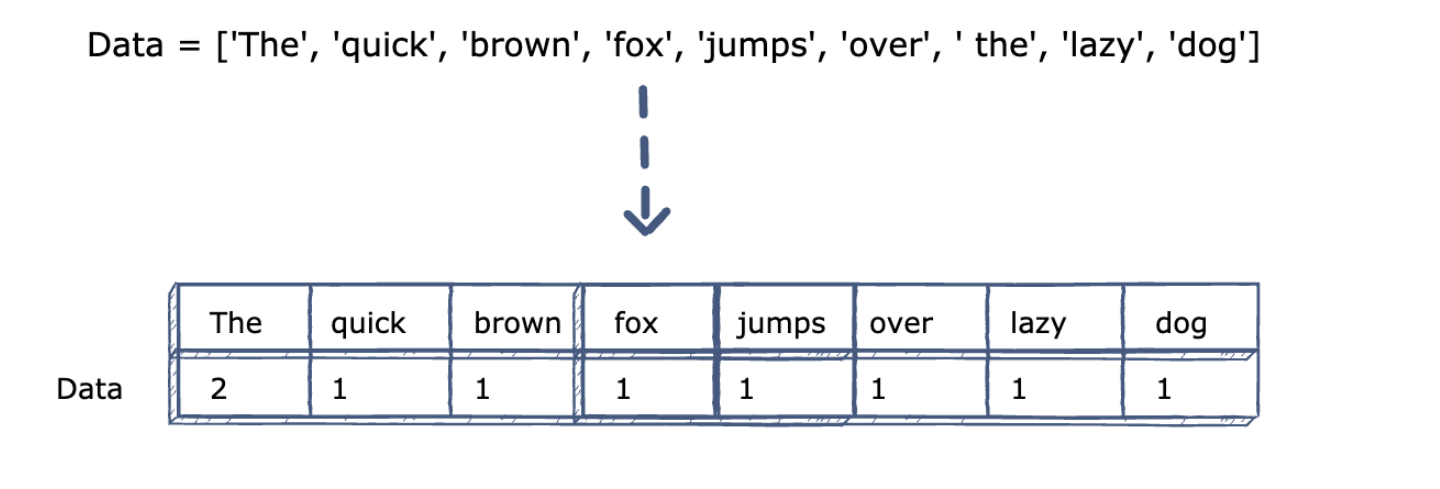

> Блок с отступами



In [10]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression

In [11]:
# Создадим собственную мини коллекцию докмунтов для примера
text_collection = ['Не жалела мама мыла',
'Мама Милу мылом мыла',
'Мила мыла не любила, мыло Мила уронила']

In [12]:
word_vectorizer = CountVectorizer()
word_vectorizer.fit(text_collection)

word_features = word_vectorizer.transform(text_collection)

In [13]:
# sparse matrix - эффективный формат хранения больших матриц
word_features

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [14]:
# матрица term-document matrix для нашей коллецкции 
print(word_features.toarray())

print(word_vectorizer.vocabulary_)

[[1 0 1 0 0 1 0 0 1 0]
 [0 0 1 0 1 1 0 1 0 0]
 [0 1 0 2 0 1 1 0 1 1]]
{'не': 8, 'жалела': 0, 'мама': 2, 'мыла': 5, 'милу': 4, 'мылом': 7, 'мила': 3, 'любила': 1, 'мыло': 6, 'уронила': 9}


Обернем получившуюся матрицу `word_features` в таблицу pandas для наглядности 

In [26]:
# Создадим талбицу pandas на основе матрицы
table_word_features = pd.DataFrame(word_features.toarray())

In [30]:
table_word_features

,жалела,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,1,0,0,1,0
1,0,0,1,0,1,1,0,1,0,0
2,0,1,0,2,0,1,1,0,1,1


In [29]:
table_word_features = table_word_features.rename({0:'жалела'}, axis = 1)

In [31]:
# Преобразуем словарь для дальнейших манипуляций
voc = word_vectorizer.vocabulary_
voc_id = {word_id:word for (word,word_id) in voc.items()}
print(voc_id)

{8: 'не', 0: 'жалела', 2: 'мама', 5: 'мыла', 4: 'милу', 7: 'мылом', 3: 'мила', 1: 'любила', 6: 'мыло', 9: 'уронила'}


In [32]:
# Переимениуе колонки из id слов в слова
table_word_features = table_word_features.rename(voc_id, axis = 1)

In [33]:
table_word_features

,жалела,любила,мама,мила,милу,мыла,мыло,мылом,не,уронила
0,1,0,1,0,0,1,0,0,1,0
1,0,0,1,0,1,1,0,1,0,0
2,0,1,0,2,0,1,1,0,1,1


Дополнительно предобработаем тексты стеммингом

In [34]:
import string
punctuations = list(string.punctuation)

# set нужен для того, чтобы поиск по словам был быстрее (потребуется позже)
from nltk.corpus import stopwords

ru_stop_words = set(stopwords.words('russian'))


stemmer_ru = SnowballStemmer("russian") 


def text_processing(text, stemmer, stop_words, punct):
    """принимает на вход предложение и возвращает леммы токенов предложения, фильтруя по стоп словам и удаляя знаки пунктуации"""
    words = word_tokenize(text) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in stop_words] # Удаляем стопслова
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    
    words = [stemmer.stem(word) for word in words] # стеммируем каждое слово
    new_text = ' '.join(words)

    return new_text

In [35]:
pretransformed_texts = [text_processing(text, stemmer_ru, ru_stop_words, punctuations) for text in text_collection]

In [37]:
pretransformed_texts

['не жалел мам мыл', 'мам мил мыл мыл', 'мил мыл люб мыл мил урон']

In [36]:
word_vectorizer = CountVectorizer()
word_vectorizer.fit(pretransformed_texts)

word_features = word_vectorizer.transform(pretransformed_texts)

In [38]:
word_features

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [39]:
voc = word_vectorizer.vocabulary_
voc_id = {word_id:word for word,word_id in voc.items()}

table_word_features_count = pd.DataFrame(word_features.toarray())
table_word_features_count = table_word_features_count.rename(voc_id, axis = 1)

table_word_features_count

,жалел,люб,мам,мил,мыл,не,урон
0,1,0,1,0,1,1,0
1,0,0,1,1,2,0,0
2,0,1,0,2,2,0,1


In [40]:
word_vectorizer = CountVectorizer()


In [41]:
word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

In [42]:
#  sparse matrix - эффективный формат хранения больших матриц

train_word_features

<187x7353 sparse matrix of type '<class 'numpy.int64'>'
	with 10170 stored elements in Compressed Sparse Row format>

In [43]:
train_word_features[0]

<1x7353 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [44]:
word_vectorizer.vocabulary_

{'продолжение': 5018,
 'фантастической': 6830,
 'истории': 2306,
 'приключениях': 4904,
 'американского': 150,
 'подростка': 4403,
 'во': 781,
 'времени': 921,
 'на': 3250,
 'этот': 7300,
 'раз': 5227,
 'помощью': 4554,
 'модернизированной': 3145,
 'доком': 1595,
 'машины': 2989,
 'марти': 2955,
 'из': 2144,
 '80': 58,
 'попадает': 4564,
 'будущее': 531,
 'дети': 1465,
 'беде': 274,
 'их': 2327,
 'надо': 3281,
 'выручать': 1062,
 'приходится': 4964,
 'повозиться': 4327,
 'со': 5910,
 'злодеем': 2062,
 'ликвидируя': 2801,
 'неисправность': 3484,
 'лебедки': 2737,
 'василий': 587,
 'кузякин': 2694,
 'получил': 4521,
 'травму': 6486,
 'путевку': 5173,
 'юг': 7306,
 'встретил': 953,
 'роковую': 5486,
 'женщину': 1796,
 'раису': 5292,
 'захаровну': 2012,
 'вернулся': 654,
 'вася': 589,
 'курорта': 2706,
 'не': 3413,
 'себе': 5666,
 'деревню': 1443,
 'дом': 1619,
 'раисы': 5293,
 'захаровны': 2013,
 'началась': 3392,
 'для': 1543,
 'него': 3440,
 'новая': 3631,
 'жизнь': 1840,
 'которой': 25

In [45]:
# объема словаря - число уникальных слов во всех текстах выборки

len(word_vectorizer.vocabulary_)

7353

In [46]:
from sklearn.tree import DecisionTreeClassifier

## Построим модель логистической регрессии на признаках word_vectorizer

In [47]:
regression = LinearRegression()
cross_val_score(regression, train_word_features, train_labels, cv=5, scoring='neg_mean_absolute_error')

array([-0.20794936, -0.17972862, -0.1594409 , -0.21097032, -0.19344661])

In [48]:
regression = LinearRegression()

cv_score = -np.mean(cross_val_score(regression, train_word_features, train_labels, cv=5, scoring='neg_mean_absolute_error'))
print('CV score is {}'.format(cv_score))

CV score is 0.1903071623789694


**Кросс-валидация** (cross-validation, она же CV) - разбиение данных на трейн и тест несколько раз разными вариантами
![texte](https://i.stack.imgur.com/8uEci.png)


In [51]:
regression = LinearRegression()
cross_val_score(regression, train_word_features, train_labels, cv=5, scoring= 'neg_mean_absolute_error')

array([-0.20794936, -0.17972862, -0.1594409 , -0.21097032, -0.19344661])

In [55]:
regression = LinearRegression()

cv_score = -np. mean(cross_val_score(regression, train_word_features, train_labels, cv=5, scoring= 'neg_mean_absolute_error'))
print('cv=score is {}'.format(cv_score))

cv=score is 0.1903071623789694


А теперь проверим на отложенной тестовой выборке

In [58]:
from sklearn.metrics import mean_absolute_error

In [60]:
regression = LinearRegression()
regression.fit(train_word_features, train_labels)
pred = regression.predict(test_word_features)
mean_absolute_error(test_labels, pred)

0.1920160753257653

Сравним с примитивным решением - в любой прогноз отправлять среднее значение рейтинг

In [61]:
pred = [train_labels.mean()]*len(test_labels)
mean_absolute_error(test_labels, pred)

0.187987012987011

## TF-IDF (term frequency - inverse document frequency)

Более сложная мера оценки важности слов

Каждое слово получает коэффициент score, обозначающее его важность. Скор - произведения 2 компонент TF  и IDF

TF считает частоту встречаемости слова в кокретном документе, IDF считает обратную частоту слова во всех документах

Логика в том, что если слово часто встречается в конкретном документе, но во всех остальных редко, то для конкретно этого документ это слово должно иметь большой вес. Но если оно встречается часто во всех документах, то скорее всего это общеупотребляемое слово. Например, местоимения (я, мы) и им нужно дать маленький вес

Приемущество данного подхода над `CountVectorizer` в том, что слова, неважные для вообще всех документов, например, предлоги или междометия — получат очень низкий вес TF-IDF (потому что часто встречаются во всех-всех документах), а важные — высокий.

In [62]:
word_vectorizer = TfidfVectorizer()

word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)



regression = LinearRegression()

cv_score = -np.mean(cross_val_score(regression, train_word_features, train_labels, cv=5, scoring='neg_mean_absolute_error'))
print('CV score is {}'.format(cv_score))

CV score is 0.18195665499063593


In [65]:
train_text

84     Продолжение фантастической истории о приключен...
125    Ликвидируя неисправность лебедки; Василий Кузя...
167    Томми Конлон — молодой боец; вернувшийся домой...
245    Тед Крамер; целиком посвятив себя карьере; не ...
109    В первой серии мы оказываемся свидетелями знак...
                             ...                        
106    Хоббит Бильбо Бэггинс пускается в грандиозный ...
14     Фильм состоит из трех новелл; объединенных фиг...
92     Восемь лет назад Бэтмен растворился в ночи; пр...
179    Всё было готово для празднования пятилетия суп...
102    70-е годы XX века. Золотое время «Формулы-1»: ...
Name: overview, Length: 187, dtype: object

In [63]:
regression.fit(train_word_features, train_labels)
pred = regression.predict(test_word_features)
mean_absolute_error(test_labels, pred)

0.18488150270680762

In [64]:
# И опять примитивное решение
pred = [train_labels.mean()]*len(test_labels)
mean_absolute_error(test_labels, pred)

0.187987012987011

# Эмбединги и модели на эмбедингах 

Дистрибутивная гипотеза - каждое слово хорошо описывается соседними словами.

Дистрибутинвая семантика - это подход к моделированию языка в рамках которого строятся контекстные векторы слов, которые принимают во внимание "контекст" слова, то есть те слова, рядом с которым чаще всего употребляется заданное слово

Что такое эмбеддинг?

Это векторное представление слова/предложения/документа

* Эмбеддинг нужен, чтобы иметь возможность сопоставлять слова между собой
* Эмбеддинг имеет фиксированную длину (например, вектор длиной 300 чисел)
* Эмбеддинг получается за счет обучения какой-либо модели
* Задача обучения - для каждого слова из обучающей выборки построить вектор, наилучшим образом его описывающий
* Типичные модели: word2vec, fasttext


![](https://www.kukuxiaai.com/images/blog/machine_learning/kaggle/kaggle_9.png)

## Воспользуемся библиотекой gensim для построения модели Word2Vec

In [88]:
import gensim
from gensim.models import Word2Vec

### Необходимо получить список названий и токенизировать его - то есть разделить на атомарные токены(слова)

In [89]:
texts = films['overview'].to_list()

In [90]:
texts[0]

'Бухгалтер Энди Дюфрейн обвинён в\xa0убийстве собственной жены и\xa0её любовника. Оказавшись в\xa0тюрьме под\xa0названием Шоушенк; он\xa0сталкивается с\xa0жестокостью и\xa0беззаконием; царящими по\xa0обе стороны решётки. Каждый; кто\xa0попадает в\xa0эти стены; становится их\xa0рабом до\xa0конца жизни. Но\xa0Энди; обладающий живым умом и\xa0доброй душой; находит подход как\xa0к заключённым; так\xa0и к\xa0охранникам; добиваясь их\xa0особого к\xa0себе расположения.'

In [91]:
texts_tokenized = [nltk.word_tokenize(text) for text in texts]

In [93]:
texts_tokenized[0][:11]

['Бухгалтер',
 'Энди',
 'Дюфрейн',
 'обвинён',
 'в',
 'убийстве',
 'собственной',
 'жены',
 'и',
 'её',
 'любовника']

### Инициализируем модель Word2Vec

In [94]:
w2v_model = Word2Vec(min_count=2,
                     window=2,
                     size=300,# размер вектора = 300
                     sample=6e-5, 
                     alpha=0.03, 
                     negative=20,
                     workers=1)

### Создадим словарь уникальных токенов - он нужен для обучения модели

In [95]:
t = time.time()

w2v_model.build_vocab(texts_tokenized)

print('Time to build vocab: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


### Запускаем обучение, подаем на вход модели токенизированные описания

In [96]:
t = time.time()

w2v_model.train(texts_tokenized, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.11 mins


### Посмотрим на результаты. Модель обучилась и теперь она умеет выделять похожие слова.
Метод most_similar возвращает топ похожих слов и коэффициент схожести.


In [97]:
list(w2v_model.wv.vocab)[:20]

['Энди',
 'в',
 'убийстве',
 'собственной',
 'жены',
 'и',
 'её',
 '.',
 'Оказавшись',
 'тюрьме',
 'под',
 'названием',
 ';',
 'он',
 'сталкивается',
 'с',
 'жестокостью',
 'по',
 'стороны',
 'Каждый']

### Посмотрим на результаты. Модель обучилась и теперь она умеет выделять похожие слова.
Метод most_similar возвращает топ похожих слов и коэффициент схожести.


In [98]:
word = 'тюрьме'
w2v_model.wv.most_similar(positive=[word])

[('блока', 0.9604859352111816),
 ('Пол', 0.9589652419090271),
 ('казни', 0.9566012620925903),
 ('под', 0.9564013481140137),
 ('смертников', 0.9562990069389343),
 ('Оказавшись', 0.9536060094833374),
 ('убийство', 0.9535046815872192),
 ('Дерек', 0.9411497116088867),
 ('названием', 0.9403215050697327),
 ('существует', 0.938860297203064)]

Как видим результаты неудовлетворительные и непонятные. Приведенные слова не похожи на "собственной". 
# Возьмем заранее обученную модель на большом корпусе текстов 
Обычно такой подход работает лучше. Скачать модели можно из интернета через api

In [100]:
import gensim.downloader as api
model = api.load("word2vec-ruscorpora-300")

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
# word = 'тюрьме'
# model.most_similar(positive=[word])

In [101]:
word = 'тюрьма_NOUN'
model.most_similar(positive=[word])

[('тюремный_ADJ', 0.7569272518157959),
 ('арестованный_NOUN', 0.6616371273994446),
 ('каторга_NOUN', 0.6608848571777344),
 ('арестант_NOUN', 0.6476430892944336),
 ('заключенный_ADJ', 0.6384239792823792),
 ('карцер_NOUN', 0.6355412602424622),
 ('пересыльный_ADJ', 0.6326044797897339),
 ('спецпсихбольница_NOUN', 0.6173180341720581),
 ('централ_NOUN', 0.6142966151237488),
 ('узник_NOUN', 0.6105508804321289)]

Подробнее можно почитать здесь

In [ ]:
# https://rusvectores.org/ru/models/

In [103]:
text = ['Сижу за решеткой в темнице сырой, скормленный в неволе орел молодой']

In [106]:
model.get_vector('тюрьма_NOUN')

array([ 1.46758538e-02,  7.43012503e-02,  9.45414603e-02,  1.24714293e-01,
       -5.78589551e-02, -4.68409061e-02, -1.09461509e-02, -1.81197878e-02,
        4.12306301e-02,  4.68595326e-02, -4.19074669e-02, -6.27444237e-02,
       -5.09983152e-02,  8.25732946e-03, -6.74449792e-03,  2.55954806e-02,
        2.95836534e-02, -8.92936438e-02,  4.15782258e-02,  2.45417245e-02,
        5.87228946e-02,  1.06156401e-01, -1.22045781e-02,  5.65286092e-02,
       -8.43140017e-03,  3.14841643e-02,  1.16805062e-01, -2.31568087e-02,
        5.57764731e-02,  2.67737042e-02,  8.24000090e-02, -6.39330447e-02,
       -3.94798145e-02,  1.92024857e-02, -1.38834026e-02,  1.84193961e-02,
       -9.05698836e-02, -3.61716934e-02, -9.90087260e-03, -6.83626607e-02,
        7.02373907e-02, -6.28513517e-03,  1.05222445e-02,  9.35887918e-02,
       -1.09792734e-02,  3.25684100e-02,  5.01620956e-02, -5.25932817e-04,
       -3.14576514e-02,  3.18038054e-02, -2.39172820e-02,  2.48218104e-02,
       -4.16420447e-03, -

# (Дополнительно) Шаблон определения тональности текста

In [66]:
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model

     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.7.0-py2.py3-none-any.whl (199 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093327 sha256=6446d5ca338cfcd431792645c3263e348553e2e505549a72d418293a7125bf8d
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [70]:
messages = films['overview']

In [71]:
messages

0      Бухгалтер Энди Дюфрейн обвинён в убийстве собс...
1      Пол Эджкомб — начальник блока смертников в тюр...
2      От лица главного героя Форреста Гампа; слабоум...
3      Фильм рассказывает реальную историю загадочног...
4      Пострадав в результате несчастного случая; бог...
                             ...                        
245    Тед Крамер; целиком посвятив себя карьере; не ...
246    Новые приключения Джека Воробья и его друзей У...
247    Флера — шестнадцатилетний мальчишка; откопавши...
248    Убить президента африканской республики. Такое...
249    Двое бывших политзаключённых; недавно вышедших...
Name: overview, Length: 250, dtype: object

In [72]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = films['overview']

results = model.predict(messages, k=5)

results = pd.DataFrame(results)
results.head()

,neutral,skip,negative,positive,speech
0,0.407343,0.160276,0.156115,0.103759,0.024433
1,0.600198,0.119213,0.217348,0.082707,0.004765
2,0.212079,0.125933,0.256842,0.100889,0.129413
3,0.803184,0.030225,0.092698,0.044691,0.020342
4,0.546748,0.109716,0.132974,0.071601,0.015435


In [87]:
tokens = tokenizer.split('всё очень плохо') 
tokens

[('всё', None), ('очень', None), ('плохо', None)]

In [86]:
pd.DataFrame(results)

,neutral,skip,negative,positive,speech
0,0.407343,0.160276,0.156115,0.103759,0.024433
1,0.600198,0.119213,0.217348,0.082707,0.004765
2,0.212079,0.125933,0.256842,0.100889,0.129413
3,0.803184,0.030225,0.092698,0.044691,0.020342
4,0.546748,0.109716,0.132974,0.071601,0.015435
...,...,...,...,...,...
245,0.222710,0.201823,0.144159,0.212079,0.013647
246,0.577505,0.233716,0.156115,0.023699,0.021625
247,0.294225,0.191943,0.256842,0.080367,0.040856
248,0.600198,0.090103,0.187143,0.119213,0.005070


In [76]:
results = model.predict(messages, k=5)
results = pd.DataFrame(results)
new_df = pd.concat([films, results], axis = 1)
new_df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,stemmed_overview,neutral,skip,negative,positive,speech
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энд дюфрейн обвин убийств собствен ж...,0.407343,0.160276,0.156115,0.103759,0.024433
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб — начальник блок смертник тюрьм « ...,0.600198,0.119213,0.217348,0.082707,0.004765
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лиц главн геро форрест гамп ; слабоумн безо...,0.212079,0.125933,0.256842,0.100889,0.129413
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказыва реальн истор загадочн оскар ш...,0.803184,0.030225,0.092698,0.044691,0.020342
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострада результат несчастн случ ; богат арист...,0.546748,0.109716,0.132974,0.071601,0.015435


In [81]:
results['negative'].max() 
print(results['negative'].max())
maxindex = results['negative'].argmax()
new_df.loc[maxindex, 'movie']

0.5698626637458801


'Шестое чувство '

In [78]:
results['positive'].max() 
print(results['positive'].max())
maxindex = results['positive'].argmax()
new_df.loc[maxindex, 'movie']

0.4225146472454071


'Песнь моря '

In [83]:
results['negative'].max() 
print(results['negative'].max())
maxindex = results['negative'].argmax()
new_df.loc[maxindex, 'overview']


0.5698626637458801


'Детский психиатр Малкольм Кроу сталкивается со\xa0странным случаем: девятилетнего Коула посещают страшные видения\xa0—\xa0призраки умерших. Все\xa0эти люди когда-то были убиты; и\xa0теперь они\xa0обрушивают на\xa0малыша свой гнетущий страх и\xa0отчаянный гнев.Как врач Малкольм бессилен помочь. Но\xa0как человек он\xa0пытается найти ключ к\xa0ужасному миру Коула; в\xa0котором веет дыханием смерти; и\xa0распускаются страшные цветы боли.'